# 3.6 Lab: Linear Regression

## 3.6.1 Libraries

In [30]:
#import all necessary modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from sklearn.datasets import load_boston # boston data set is part of sklearn

## 3.6.2 Simple Linear Regression

The Boston data set is part of the sklearn module. This data set records MEDV (median house value) for 506 neighborhoods around Boston. We will seek to predict MEDV using 13 predictors such as RM (average number of rooms per house), AGE (average age of houses), and LSTAT (percent of households with low socioeconomic status).

In [31]:
# Load Boston housing data set

boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [32]:
# Create the data frame for analysis

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We will start by using the statsmodels module to fit a simple linear regression model, with MEDV as the response and LSTAT as the predictor. The basic syntax is smf.ols('y~x', data), where y is the response, x the predictor, and data is the data frame in which these two variables are kept.

In [33]:
lm_fit=smf.ols('MEDV~LSTAT',boston).fit()

For more detailed information, we use lm_fit.summary(). This gives us p_values
and standard errors for the coefficients, as well as the R2 statistic
and F-statistic for the model.

In [34]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           5.08e-88
Time:                        09:51:10   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
lm_fit.params


Intercept    34.553841
LSTAT        -0.950049
dtype: float64

In order to obtain a confidence interval for the coefficient estimates, we can
use the conf_int() command.

In [36]:
lm_fit.conf_int()

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


In [37]:
lm_fit.fittedvalues

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
5      29.604084
6      22.744727
7      16.360396
8       6.118864
9      18.307997
10     15.125332
11     21.946686
12     19.628566
13     26.706433
14     24.806335
15     26.506923
16     28.302516
17     20.616617
18     23.447764
19     23.837284
20     14.583803
21     21.414658
22     16.768917
23     15.666860
24     19.068036
25     18.868526
26     20.483610
27     18.136988
28     22.393209
29     23.172250
         ...    
476    16.806919
477    10.888111
478    17.424451
479    22.098694
480    24.350311
481    27.200459
482    27.893995
483    24.654327
484    21.880183
485    24.502319
486    20.322102
487    23.675776
488    17.395950
489    11.781158
490     6.356376
491    17.386449
492    21.870682
493    23.143748
494    21.642670
495    17.832972
496    14.469798
497    21.158145
498    22.279203
499    20.208096
500    20.939634
501    25.366864
502    25.927393
503    29.1955

The statsmodels module can be used to produce confidence intervals and prediction intervals for the prediction of MEDV for a given value of LSTAT.


In [38]:
predictors = pd.DataFrame({'LSTAT':[5,10,15]})
predictions = lm_fit.get_prediction(predictors)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


For instance, the 95% confidence interval associated with a lstat value of
10 is (24.47, 25.63), and the 95% prediction interval is (12.828, 37.28). As
expected, the confidence and prediction intervals are centered around the
same point (a predicted value of 25.05 for medv when lstat equals 10), but
the latter are substantially wider.

Text(0, 0.5, 'MEDV')

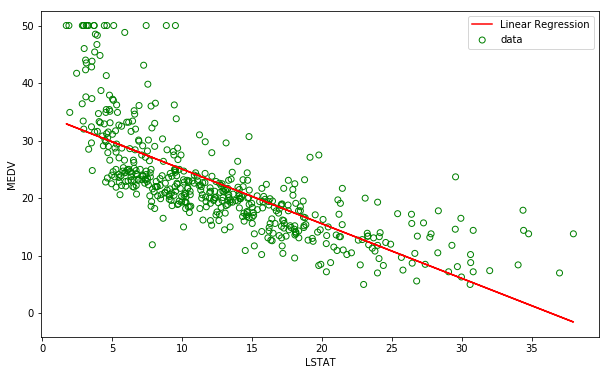

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
# Plot the data
ax.scatter(boston['LSTAT'], boston['MEDV'], facecolors='none', edgecolors='g', label="data")
# plot the models fitted values
ax.plot(boston['LSTAT'], lm_fit.fittedvalues, 'r', label="Linear Regression");

ax.legend(loc='best')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Next we examine some diagnostic plots, several of which were discussed
in Section 3.3.3
We can plot the residuals, ei = yi − ˆyi, versus the predictor xi.

In [40]:
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(lm_fit)
leverage = influence.hat_matrix_diag
stud_residuals = influence.resid_studentized_external

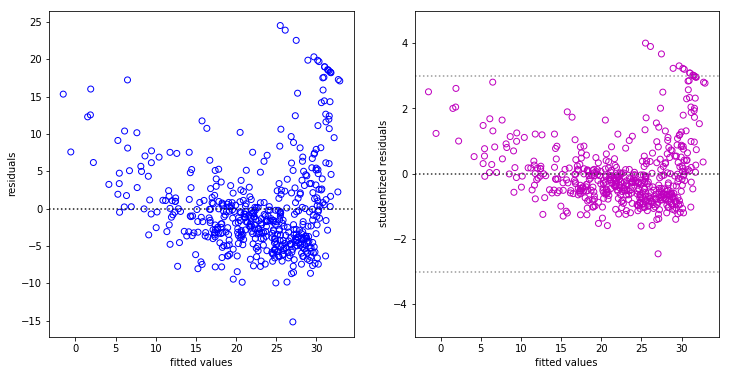

In [41]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Plot the residual for each fitted value
ax1.scatter(lm_fit.fittedvalues, lm_fit.resid, facecolors='none',color='b');
ax1.axhline(0, ls=":", c="0.1")
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');

# studentized residuals plot
ax2.scatter(lm_fit.fittedvalues, stud_residuals,facecolors='none', color='m')
ax2.axhline(0, ls=":", c=".2")
ax2.axhline(-3, ls=":", c=".6")
ax2.axhline(3, ls=":", c=".6")
ax2.set_ylim(-5, 5)
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');

# typically we expect studentized residuals values between −3 and 3.


On the basis of the residual plots, there is some evidence of non-linearity.
Leverage statistics can be computed for any number of predictors

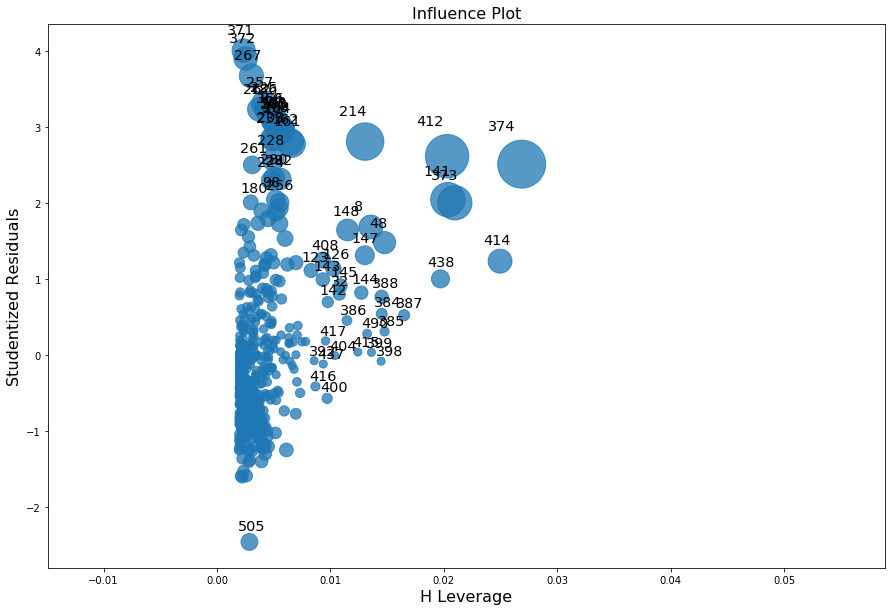

In [42]:
fig, ax = plt.subplots(figsize=(15,10)) # Studentized Residuals / leverage 'influence' plot
fig = sm.graphics.influence_plot(lm_fit, ax=ax, criterion="cooks")

In [43]:
# item with the highest leverage (0-indexed)

leverage.argmax(),leverage.max()

(374, 0.026865166510283478)

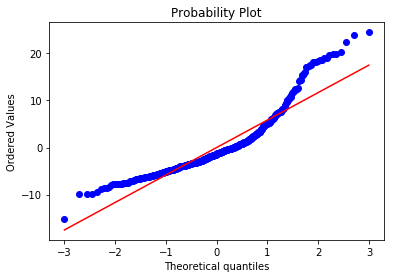

In [44]:
# the normality of the residuals

from scipy.stats import probplot

_ = probplot(lm_fit.resid, plot=plt)

## 3.6.3 Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we again use the statsmodels module. The syntax smf.ols('y~x1+x2+x3, data) is used to fit a model with three predictors, x1, x2, and x3. The summary() function now outputs the regression coefficients for all the predictors.

In [45]:
lm_fit = smf.ols('MEDV~LSTAT+AGE', boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           2.98e-88
Time:                        09:51:54   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
LSTAT         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
AGE            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Boston data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [97]:
all_columns = list(boston.columns)
all_columns.remove('MEDV')
all_var = 'MEDV~' + '+'.join(all_columns)
all_var

'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [101]:
lm_all = smf.ols(all_var, boston)
lm_fit=lm_all.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 11 Sep 2019   Prob (F-statistic):          6.72e-135
Time:                        10:40:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Instead of inspecting the correlation matrix, a better way to assess multi- collinearity is to compute the variance inflation factor (VIF).
The smallest possible value for VIF is 1, which indicates the complete absence of collinearity.
If VIF is greater than 5, then the explanatory variable is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# exog is the predictor matrix of the model
VIF = [(predictor, variance_inflation_factor(lm_all.exog, idx)) 
        for (idx, predictor) in enumerate(lm_all.exog_names)]

In [105]:
for tup in VIF:
    print(format(tup[0]), format(tup[1]))

Intercept 585.2652379423121
CRIM 1.7921915474332406
ZN 2.298758178749441
INDUS 3.9915964183460315
CHAS 1.0739953275537883
NOX 4.393719847577493
RM 1.933744435783257
AGE 3.1008255128153372
DIS 3.9559449063727263
RAD 7.484496335274472
TAX 9.00855394759707
PTRATIO 1.7990840492488984
B 1.3485210764063753
LSTAT 2.9414910780919366


In [106]:
for tup in VIF:
    print('{:9}'.format(tup[0]),format(tup[1]))

Intercept 585.2652379423121
CRIM      1.7921915474332406
ZN        2.298758178749441
INDUS     3.9915964183460315
CHAS      1.0739953275537883
NOX       4.393719847577493
RM        1.933744435783257
AGE       3.1008255128153372
DIS       3.9559449063727263
RAD       7.484496335274472
TAX       9.00855394759707
PTRATIO   1.7990840492488984
B         1.3485210764063753
LSTAT     2.9414910780919366


In [107]:
for tup in VIF:
    print('{:9}'.format(tup[0]), '{:.2f}'.format(tup[1])) # it looks the best :)

Intercept 585.27
CRIM      1.79
ZN        2.30
INDUS     3.99
CHAS      1.07
NOX       4.39
RM        1.93
AGE       3.10
DIS       3.96
RAD       7.48
TAX       9.01
PTRATIO   1.80
B         1.35
LSTAT     2.94


What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, age has a high p-value. So we may wish to run a regression excluding this predictor. The following syntax results in a regression using all predictors except age.

In [108]:
all_columns = list(boston.columns)
all_columns.remove('MEDV')
all_columns.remove('AGE')
lm_all = 'MEDV~' + '+'.join(all_columns)
lm_all

'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [110]:
lm_fit = smf.ols(lm_all, boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Wed, 11 Sep 2019   Prob (F-statistic):          6.08e-136
Time:                        10:46:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
CRIM          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
ZN             0.0463      0.014      3.404      0.001       0.020       0.073
INDUS          0.0206      0.061      0.335      0.738      -0.100       0.141
CHAS           2.6890      0.860      3.128      0.002       1.000       4.378
NOX          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
RM             3.8144      0.408      9.338      0.000       3.012       4.617
DIS           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
RAD            0.3058      0.066      4.627      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
PTRATIO       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
B              0.0093      0.003      3.481      0.001       0.004       0.015
LSTAT         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.4 Interaction Terms

It is easy to include interaction terms in a linear model. The syntax lstat:black tells statsmodels to include an interaction term between lstat and black. The syntax lstat*age simultaneously includes lstat, age, and the interaction term lstat×age as predictors; it is a shorthand for lstat+age+lstat:age.

In [111]:
smf.ols(formula='MEDV ~ LSTAT*AGE', data=boston).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           4.86e-88
Time:                        10:53:46   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
LSTAT         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
AGE           -0.0007      0.020     -0.036      0.971      -0.040       0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.5 Non-linear Transformations of the Predictors

Statsmodel can also accommodate non-linear transformations of the predictors. For instance, given a predictor $X$, we can create a predictor $X^2$ using I(X**2). We now perform a regression of medv onto lstat
and lstat2.

In [113]:
lm_fit2 = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', boston).fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          1.56e-112
Time:                        10:44:33   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(LSTAT ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the anova_lm() function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [153]:
from statsmodels.stats.api import anova_lm

lm_fit = smf.ols('MEDV ~ LSTAT', boston).fit()
lm_fit2 = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', boston).fit()

anova_lm(lm_fit, lm_fit2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictor, lstat, while Model 2 corresponds to the larger quadratic model that has two 2 predictors, lstat and lstat^2. The anova_lm() function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors lstat and lstat2 is far superior to the model that only contains the predictor lstat .

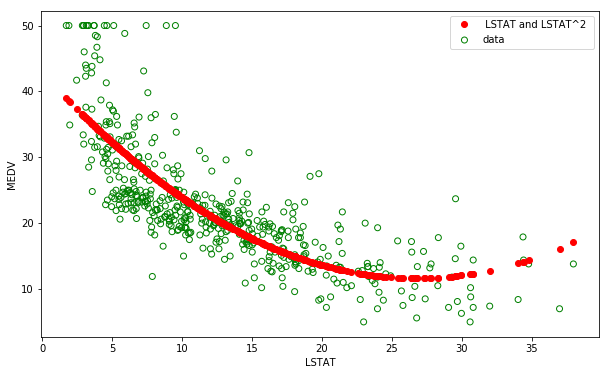

In [148]:
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
ax.scatter(boston['LSTAT'], boston['MEDV'], facecolors='none', edgecolors='g', label="data");
# plot the models fitted values
ax.plot(boston['LSTAT'], lm_fit2.fittedvalues, 'r', marker='o',linestyle='none', label=" LSTAT and LSTAT^2 ");

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

If we plot the residuals for Model 2, there is little discernible pattern in the residuals.

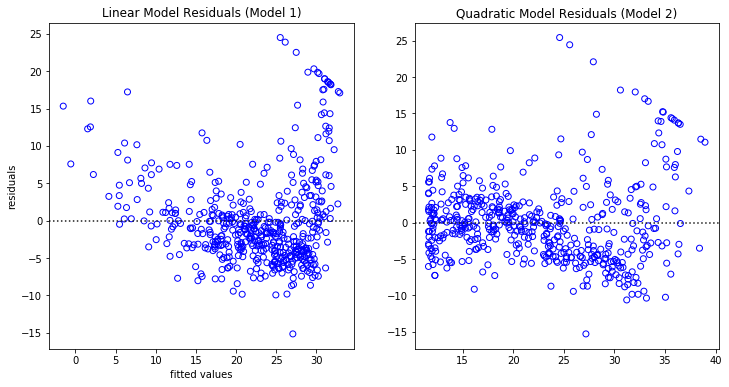

In [151]:
# Create plots of residuals
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Plot the residual for each fitted value for the linear model
ax1.scatter(lm_fit.fittedvalues, lm_fit.resid, facecolors='none', edgecolors='b');
ax1.axhline(0, ls=":", c="0.1")
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
ax1.set_title('Linear Model Residuals (Model 1)')

ax2.scatter(lm_fit2.fittedvalues, lm_fit2.resid, facecolors='none', edgecolors='b');
ax2.axhline(0, ls=":", c="0.1")
ax2.set_title('Quadratic Model Residuals (Model 2)');

In order to create a cubic fit, we can include a predictor of the form I(X**3). However, this approach can start to get cumbersome for higher-order polynomials. The following command
produces a fifth-order polynomial fit:

In [157]:
poly = 'MEDV ~ LSTAT +' + ' + '.join('I(LSTAT**{})'.format(i) for i in range(2, 6))
poly

'MEDV ~ LSTAT +I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4) + I(LSTAT**5)'

In [158]:
lm_fit5 = smf.ols(poly, boston).fit()
lm_fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 18 Sep 2019   Prob (F-statistic):          8.73e-122
Time:                        09:32:25   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783      0.000      60.618      74.781
LSTAT           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
I(LSTAT ** 2)     1.2728      0.223      5.703      0.000       0.834       1.711
I(LSTAT ** 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
I(LSTAT ** 4)     0.0017      0.000      4.143      0.000       0.001       0.003
I(LSTAT ** 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Of course, we are in no way restricted to using polynomial transformations
of the predictors. Here we try a log transformation

In [163]:
lm_log=smf.ols('MEDV ~ np.log(LSTAT)', boston).fit()
lm_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Wed, 18 Sep 2019   Prob (F-statistic):          9.28e-122
Time:                        09:38:33   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004      0.000      50.228      54.021
np.log(LSTAT)   -12.4810      0.395    -31.627      0.000     -13.256     -11.706
==============================================================================
Omnibus:                      126.181   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.855
Skew:                           1.237   Prob(JB):                     4.74e-71
Kurtosis:                       6.039   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

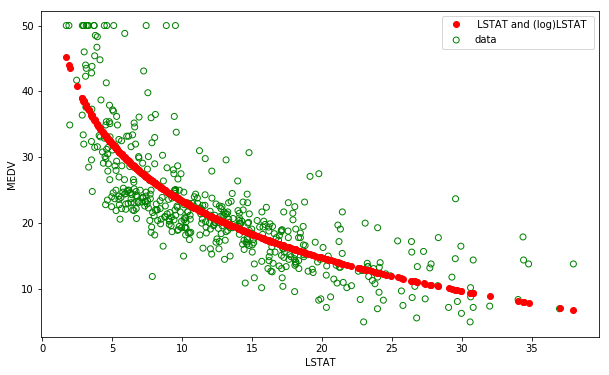

In [165]:
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
ax.scatter(boston['LSTAT'], boston['MEDV'], facecolors='none', edgecolors='g', label="data");

# Plot the models fitted values
ax.plot(boston['LSTAT'], lm_log.fittedvalues, 'r', marker='o',linestyle='none', label=" LSTAT and (log)LSTAT ");

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

## 3.6.6 Qualitative Predictors

We will now examine the Carseats data. We will attempt to predict Sales (child car seat sales) in 400 locations based on a number of predictors.

In [169]:
carseats = pd.read_csv('Carseats.csv', index_col = 0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


The Carseats data includes qualitative predictors such as ShelveLoc, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor ShelveLoc takes on three possible values, Bad, Medium, and Good.

Given a qualitative variable such as Shelveloc, statsmodels generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [195]:
 carseats.columns

Index(['Unnamed: 0', 'Sales', 'CompPrice', 'Income', 'Advertising',
       'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [196]:
# Construct the formula with two interaction terms

all_columns = carseats.columns[2:] # we must delete two columns 'Unnamed: 0', 'Sales'

formula ='Sales ~ ' + ' + '.join(all_columns) + ' + Income:Advertising + Price:Age'
formula

'Sales ~ CompPrice + Income + Advertising + Population + Price + ShelveLoc + Age + Education + Urban + US + Income:Advertising + Price:Age'

In [197]:
lm_fit = smf.ols(formula, carseats).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 18 Sep 2019   Prob (F-statistic):          6.14e-166
Time:                        10:47:52   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Python has created a ShelveLoc[T.Good] dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. It has also created a ShelveLoc[T.Medium] dummy variable that equals 1 if the shelving location is medium, and 0 otherwise. A bad shelving location corresponds to a zero for each of the two dummy variables.
The fact that the coefficient for ShelveLoc[T.Good] in the regression output is positive indicates that a good shelving location is associated with high sales (relative to a bad location). And ShelveLoc[T.Medium] has a smaller positive coefficient, indicating that a medium shelving location leads to higher sales than a bad shelving location but lower sales than a good shelving location.

The get_dummies() function returns the coding that Python uses for the dummy variables.

In [208]:
ShelveLoc_dummies = pd.get_dummies(carseats.ShelveLoc, prefix='ShelveLoc').iloc[:,1:]
ShelveLoc_dummies.head()


,ShelveLoc_Good,ShelveLoc_Medium
0,0,0
1,1,0
2,0,1
3,0,1
4,0,0


## 3.6.7 Writing Functions

The key word in Python for user defined function is 'def'. Two examples below:

In [10]:
def current_time():
    from datetime import datetime
    print(datetime.now())
    
current_time()

2019-09-19 10:22:57.360743


In [11]:
def square(x):
    return x**2

In [12]:
square(4)

16